## Module 4, Activity 1: Faceting Plots and Semantic Figure Composition

From previous activities, we already know how to create faceted figures. What you may have also noticed is that as we've faceted increasingly complex figures with Matplotlib, we've been repeating larger and larger sections of code. This is messy and dangerous, because as our code gets larger there are more opportunities for us to introduce small but fatal mistakes into our scripts. To address this we can do two things, which we'll explore in this activity. First, we can create helper functions that allow us to easily plot the same figure over and over again with different datasets. Second, when faceting we can use for-loops to minimise the amount of repetition in our code.

We'll finish by exploring Semantic Figure Composition - an easy way to create Figures with subplots arranged in non-uniform grid. 

Let's start by loading our libraries and importing the bicycle data we used last Module.

In [167]:
# import packages/libraries
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

bike_df = pd.read_csv("data/bike_data.csv")
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Now, let's have a look at the code we wrote for the faceted plot showing daily bike hires against normalised temperature, faceted by season.

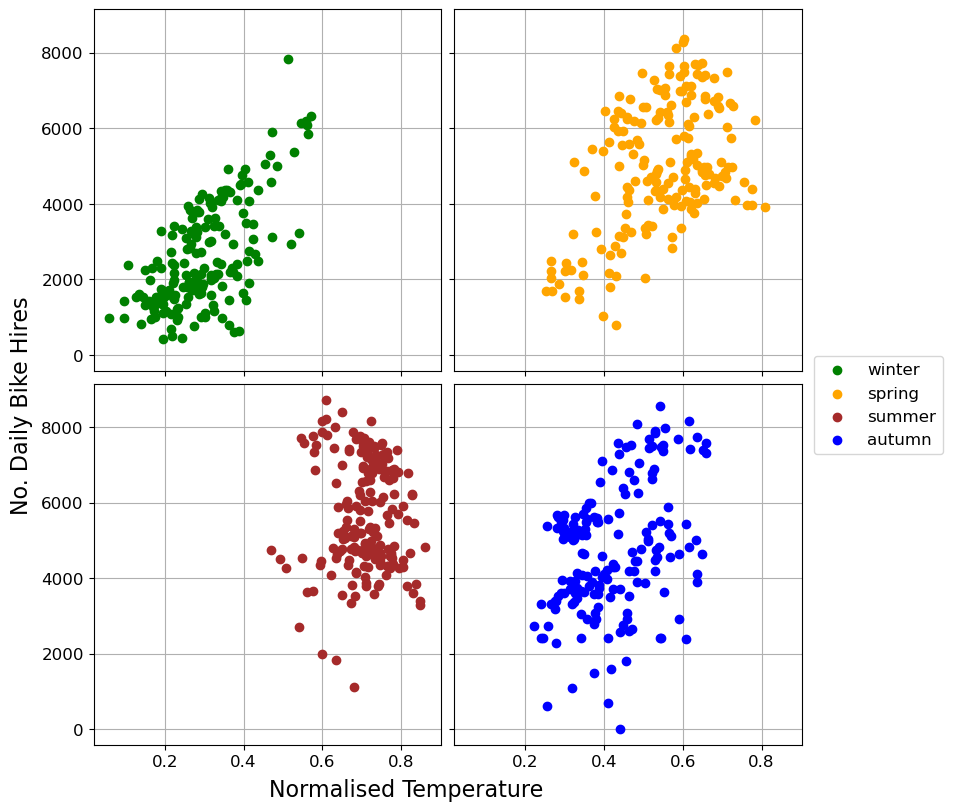

In [168]:
seasons = ["winter", "spring", "summer", "autumn"]

winter_df = bike_df[bike_df.season == 1]
spring_df = bike_df[bike_df.season == 2]
summer_df = bike_df[bike_df.season == 3]
autumn_df = bike_df[bike_df.season == 4]

## Create a function with a list of font specifications for titles, x and y axis labels
def set_pub(): ## Define 'def' a function with style features
    matplotlib.rcParams.update({
        "figure.titlesize": 16,
        "axes.labelsize": 12,
        "xtick.labelsize": 12,   # large tick labels
        "ytick.labelsize": 12,
        "legend.fontsize": 12, # legend title font size
         "axes.axisbelow": True,
        "axes.grid": True
    })


set_pub() # Run function

fig, axs = plt.subplots(2,2,figsize = (8,8), constrained_layout = True, sharex = True, sharey = True)
### TOP ROW
winter = axs[0,0].scatter('temp', 'cnt', data=winter_df, marker='o', color='green')

spring = axs[0,1].scatter('temp', 'cnt', data=spring_df, marker='o', color='orange')

### BOTTOM ROW
summer = axs[1,0].scatter('temp', 'cnt', data=summer_df, marker='o', color='brown')

autumn = axs[1,1].scatter('temp', 'cnt', data=autumn_df, marker='o', color='blue')

fig.legend([winter, spring, summer, autumn], seasons, bbox_to_anchor=(1,0.5), loc = "center left")

fig.supxlabel("Normalised Temperature") # X-axis label
fig.supylabel("No. Daily Bike Hires") # Y-axis label

plt.show() # Command to show plot

matplotlib.rcdefaults()  # restore the default style

This isn't a very large piece of code, but there's a lot of repetition, so it's perfect to demonstrate how we can use functions and for-loops to automate our plotting. Let's start with a function for each plot. Note that the template for this function comes from [here](https://matplotlib.org/stable/tutorials/introductory/usage.html#making-a-helper-functions). For each plot, we're calling the **ax.scatter** function, specifying the x and y-axis variables, the dataset they come from, and some aesthetic attributes (point marker and colour). 

In [169]:
def my_plotter(ax, data1, data2, param_dict): # Specify function name and inputs
    out = ax.scatter(data1, data2, **param_dict) # Specify function return - a scatterplot
    return out # Command function to return scatterplot

So far so good. But what is **param_dict**? It's a dictionary of aesthetic attributes (parameters). When it's fed into **ax.scatter** within the **my_plotter** function, the asterisks tell Python to dereference the dictionary entries and match them to their matching variable names in **ax.scatter**.  So for our scatterplots, we specified the marker style and colour. Let's recreate our faceted figure with our **my_plotter** function.

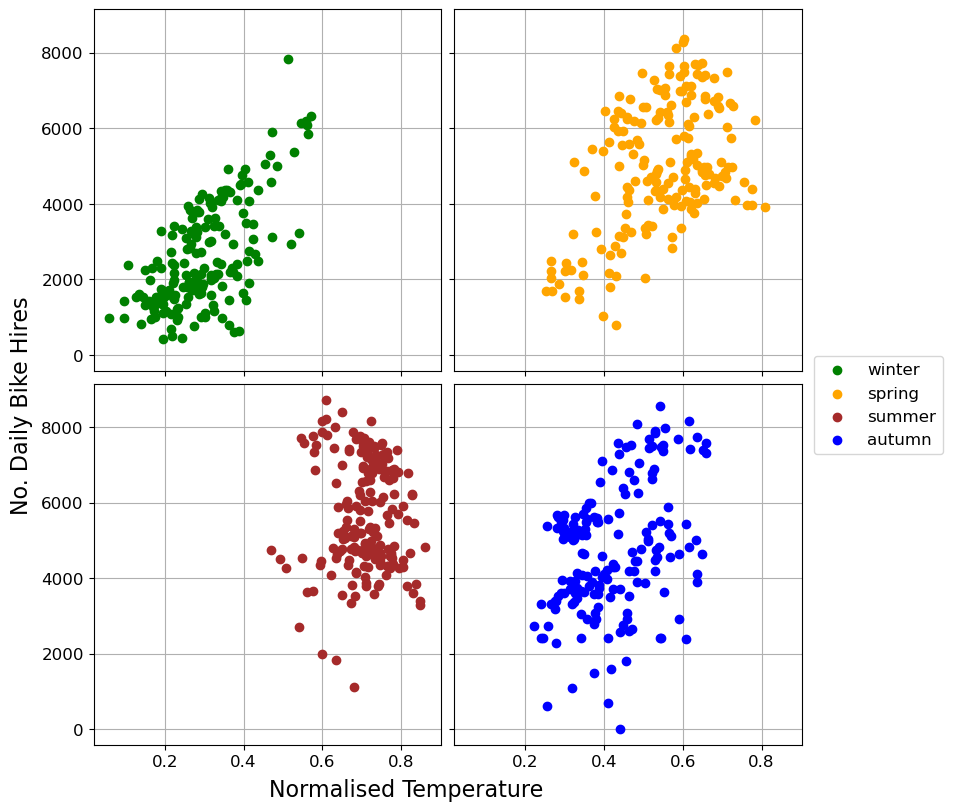

In [170]:
seasons = ["winter", "spring", "summer", "autumn"]

winter_df = bike_df[bike_df.season == 1]
spring_df = bike_df[bike_df.season == 2]
summer_df = bike_df[bike_df.season == 3]
autumn_df = bike_df[bike_df.season == 4]

set_pub() # Run our style function


fig, axs = plt.subplots(2,2,figsize = (8,8), constrained_layout = True, sharex = True, sharey = True)
### TOP ROW
winter = my_plotter(axs[0,0], winter_df.temp, winter_df.cnt, {'marker':'o', 'color':'green'})
spring = my_plotter(axs[0,1], spring_df.temp, spring_df.cnt, {'marker':'o', 'color':'orange'})

### BOTTOM ROW
summer = my_plotter(axs[1,0], summer_df.temp, summer_df.cnt, {'marker':'o', 'color':'brown'})
autumn = my_plotter(axs[1,1], autumn_df.temp, autumn_df.cnt, {'marker':'o', 'color':'blue'})

fig.legend([winter, spring, summer, autumn], seasons, bbox_to_anchor=(1,0.5), loc = "center left")

fig.supxlabel("Normalised Temperature") # X-axis label
fig.supylabel("No. Daily Bike Hires") # Y-axis label

plt.show() # Command to show plot

matplotlib.rcdefaults()  # restore the default style

Although we didn't make our code any smaller this is a nice toy example of how we can substitute repeated plotting commands with a single function call. But, there's still a lot of repetition in the script above, which we can minimise further using a for-loop.

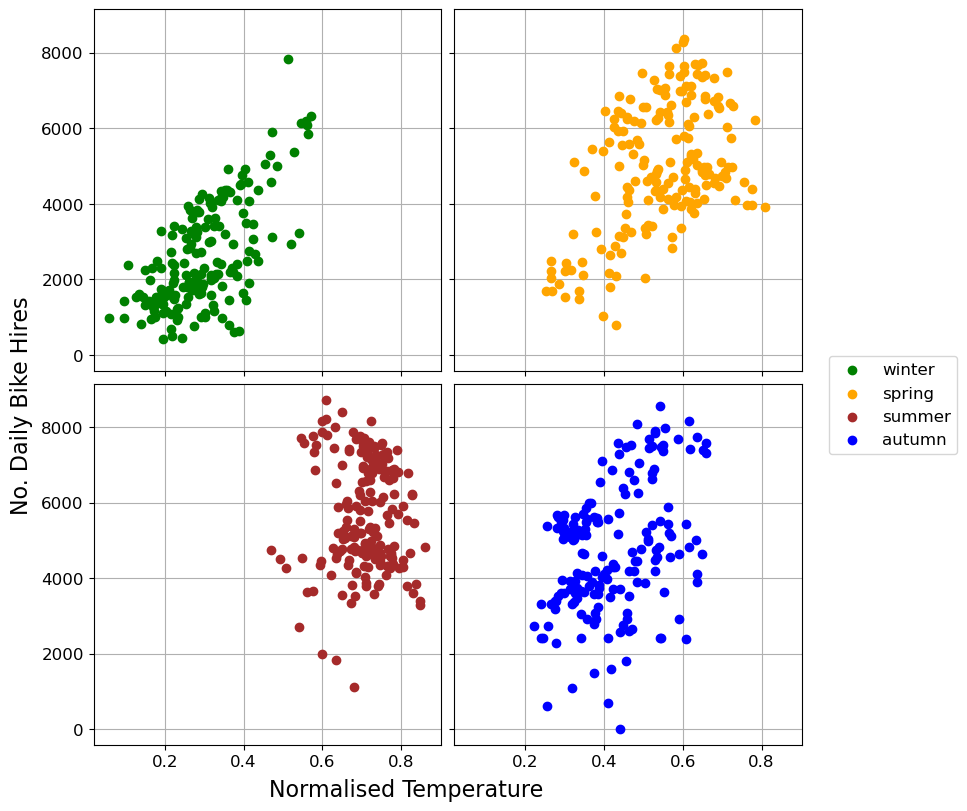

In [171]:
bike_df = pd.read_csv("data/bike_data.csv")

seasons = ["winter", "spring", "summer", "autumn"]
colours = ["green", "orange", "brown", "blue"]
markers = ["o", "o", "o", "o"]
num_facet_rows = 2
num_facet_cols = len(seasons)//num_facet_rows + len(seasons)%num_facet_rows

set_pub() # Run our style function
fig, axs = plt.subplots(num_facet_rows, num_facet_cols,figsize = (8,8), sharex = True, sharey = True, constrained_layout=True) 

for i in range(0, len(seasons)):
    curr_df = bike_df[bike_df.season == i+1]
    
    curr_facet_row = i//num_facet_cols
    curr_facet_col = i%num_facet_cols

    my_plotter(axs[curr_facet_row,curr_facet_col], curr_df.temp, curr_df.cnt, {'marker':markers[i], 
                                                                               'color':colours[i],
                                                                              'label':seasons[i]}) 

fig.supxlabel("Normalised Temperature") # X-axis label
fig.supylabel("No. Daily Bike Hires") # Y-axis label


### Create and fill empty handles and labels lists for fig.legend, 
### is there a way to plot this figure without a legend?
handles = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    handles.extend(axLine)
    labels.extend(axLabel)
   
fig.legend(handles, labels,           
           loc = 'center right', bbox_to_anchor=(1.2,0.5))


plt.show()    
matplotlib.rcdefaults()  # restore the default style

**Exercises:**
1) Write a comment for each line of code in the script above, so that you understand what it is doing.\
2) Experiment with colours, linewidths and the number of rows in your figure.\
3) Is there a way to plot this figure without a legend? If so, create a new figure without a legend. What artists did you need to introduce/remove in this new figure?\
4) Load the diamonds.csv dataset. Then, create a faceted figure showing the relationship between carat and price, grouped by clarity. Plot this faceted figure by modifying the helper function and for-loop script above. 

### Semantic figure composition

So far, we've only used gridded figures where each subplot has the same area. But, what if we wanted to create a more complex layout, perhaps making one plot larger than the others? We can use the **subplot_mosaic** function to do this easily. The excellent documentation for this function is [here](https://matplotlib.org/stable/tutorials/provisional/mosaic.html). The **subplot_mosaic** function allows us to 'draw' the axes we want as characters. For example, if we wanted to create a 2x2 grid using **subplot_mosaic**, where each subplot space was labelled A-D, we would do the following (note that first, we've copied the function from [here](https://matplotlib.org/stable/tutorials/provisional/mosaic.html) to annotate each box with its label):

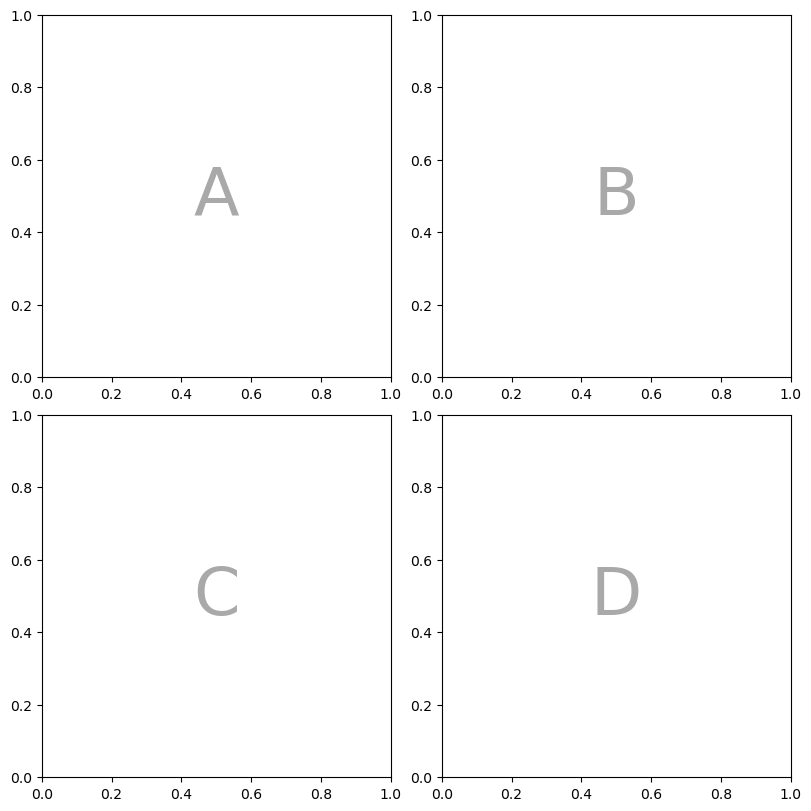

In [147]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)
        
        

fig = plt.figure(figsize = (8,8), constrained_layout=True)
axd = fig.subplot_mosaic(
    [
        ["A", "B"],
        ["C", "D"],
    ])
identify_axes(axd)

If we wanted to fill these subplots, we can call them by their name. For example, let's fill the bottom-left subplot ("B") with a scatterplot of normalised temperature and daily bike hires (across all seasons) with our **my_plotter** function:

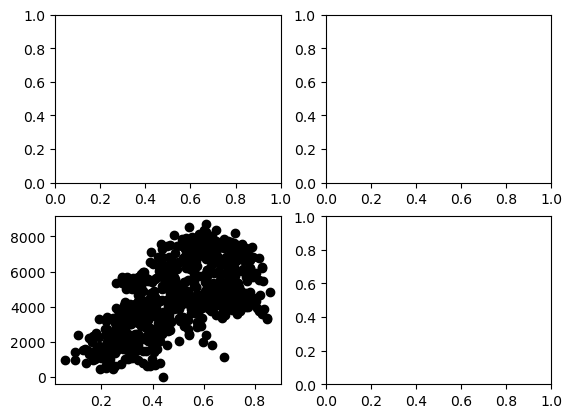

In [115]:
fig = plt.figure()
axd = fig.subplot_mosaic(
    [
        ["A", "C"],
        ["B", "D"],
    ],
)

my_plotter(axd["B"], bike_df.temp, bike_df.cnt, {'marker':"o", 'color':"black",'label':"All data"}) 
plt.show()

Now, let's do something a bit more complex. Let's create a mosaic figure to visualise the overall relationship between bike hires and ambient temperature, as well as subsetted by season. First, let's set up our mosaic:

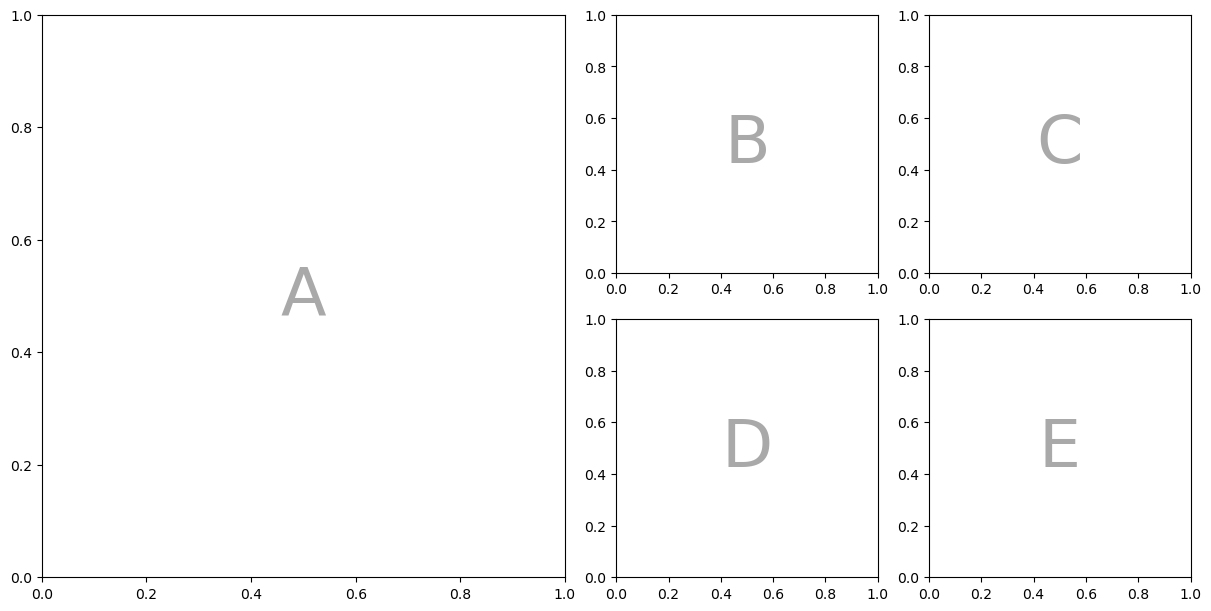

In [148]:
fig = plt.figure(figsize = (12,6), constrained_layout=True)
axd = fig.subplot_mosaic(
    [
        ["A","A","B","C"],
        ["A","A","D","E"],
    ],
)
identify_axes(axd)


Subplot "A" will contain all of our data, while subplots B-E will each contain a seasonal subset. Let's create this figure, using all the tools we've learned in this activity so far.

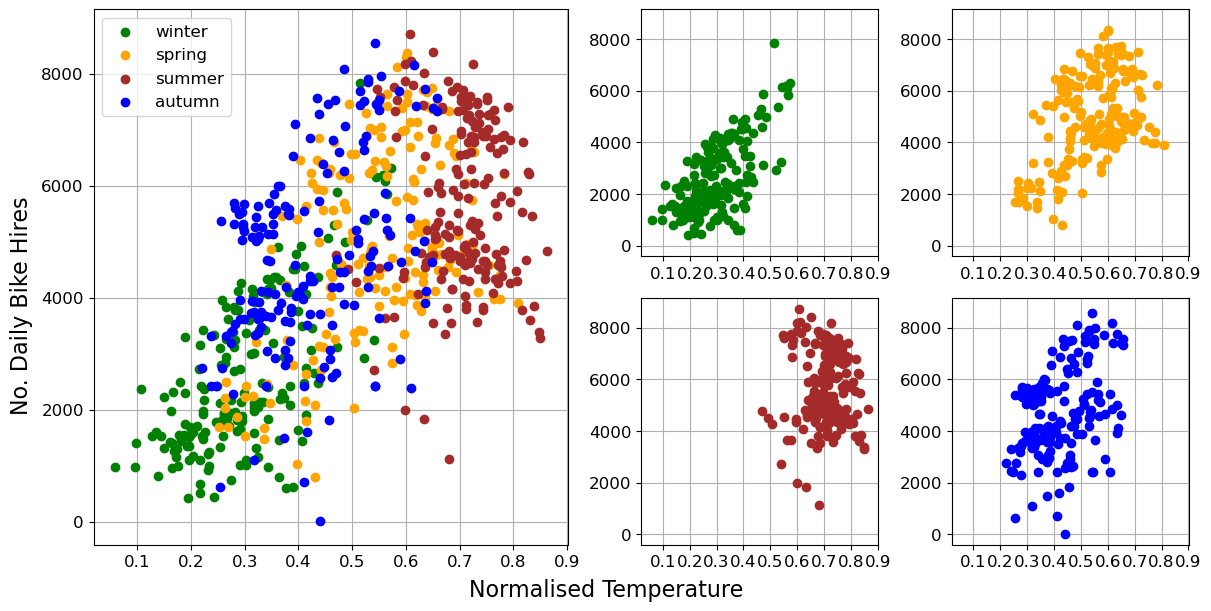

In [160]:
set_pub() # Run our style function
fig = plt.figure(figsize = (12,6), constrained_layout=True)
axd = fig.subplot_mosaic(
    [
        ["A","A","B","C"],
        ["A","A","D","E"],
    ], sharex = True, sharey = True
)

### SUBPLOT A
winter = axd["A"].scatter('temp', 'cnt', data=winter_df, marker='o', color='green')
spring = axd["A"].scatter('temp', 'cnt', data=spring_df, marker='o', color='orange')
summer = axd["A"].scatter('temp', 'cnt', data=summer_df, marker='o', color='brown')
autumn = axd["A"].scatter('temp', 'cnt', data=autumn_df, marker='o', color='blue')
axd["A"].legend([winter, spring, summer, autumn], seasons)


### SUBPLOT B-D
seasons = ["winter", "spring", "summer", "autumn"]
colours = ["green", "orange", "brown", "blue"]
markers = ["o", "o", "o", "o"]
subplot_id = ["B", "C", "D", "E"]
num_facet_rows = 2
num_facet_cols = len(seasons)//num_facet_rows + len(seasons)%num_facet_rows

for i in range(0, len(seasons)):
    curr_df = bike_df[bike_df.season == i+1]
    
    curr_facet_row = i//num_facet_cols
    curr_facet_col = i%num_facet_cols

    my_plotter(axd[subplot_id[i]], curr_df.temp, curr_df.cnt, {'marker':markers[i], 
                                                                               'color':colours[i],
                                                                              'label':seasons[i]}) 
    axd[subplot_id[i]].xaxis.set_tick_params(labelbottom=True) # Turn x-axis tick labels back on for subplot B-E
    axd[subplot_id[i]].yaxis.set_tick_params(labelbottom=True) # Turn y-axis tick labels back on for subplot B-E

### FIGURE LABELS
fig.supxlabel("Normalised Temperature") # X-axis label
fig.supylabel("No. Daily Bike Hires") # Y-axis label

plt.show()    
matplotlib.rcdefaults()  # restore the default style

Notice that we turned back on the x and y-axis tick labels in the smaller subplots (they're switched off automatically when sharex and sharey are True). Even though this makes the plot a bit more cluttered, it's easier for the audience to decode the smaller subplots when they don't have to use the axis tick labels on the larger subplot as a reference.

**Exercises:** 
1) Read through the  **subplot_mosaic** documentation [here](https://matplotlib.org/stable/tutorials/provisional/mosaic.html) and try two other mosaic configurations using the diamonds dataset. Try creating a mosaic without colours by adding a title or annotation to each subplot. \
2) The x-axis of the smaller subplots in the figure above look a bit cluttered, try a smaller font size or changing the frequency of the x-tick labels.